In [1]:
# Read data
import pandas as pd
import numpy as np
df = pd.read_csv('riders.csv')

In [2]:
# Clean up the data
column_list=df.columns.to_list()
df[column_list] = df[column_list].replace({'\$': '', ',': ''}, regex=True)
df[column_list] = df[column_list].astype(int)
df.head()

,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
0,1,192000,15,1800000,5800,50
1,2,190400,15,1790000,6200,50
2,3,191200,15,1780000,6400,60
3,4,177600,25,1778000,6500,60
4,5,176800,25,1750000,6550,60


In [3]:
# We would build a simple linear regression with dendepend variable Number of weekly riders and independent variable Price per week
# Drop the unused variables
df=df.drop(['City ', 'Population of city', 'Monthly income of riders', 'Average parking rates per month'], axis=1)

# Linear Regression with Least Squares

In [328]:
import statsmodels.api as sm
X=df['Price per week']
y=df['Number of weekly riders']
X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     Number of weekly riders   R-squared:                       0.933
Model:                                 OLS   Adj. R-squared:                  0.930
Method:                      Least Squares   F-statistic:                     348.5
Date:                     Fri, 26 Feb 2021   Prob (F-statistic):           3.41e-16
Time:                             14:13:04   Log-Likelihood:                -270.39
No. Observations:                       27   AIC:                             544.8
Df Residuals:                           25   BIC:                             547.4
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

C:\Users\xue.ju\AppData\Local\Continuum\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\xue.ju\AppData\Local\Continuum\anaconda\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\xue.ju\AppData\Local\Continuum\anaconda\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


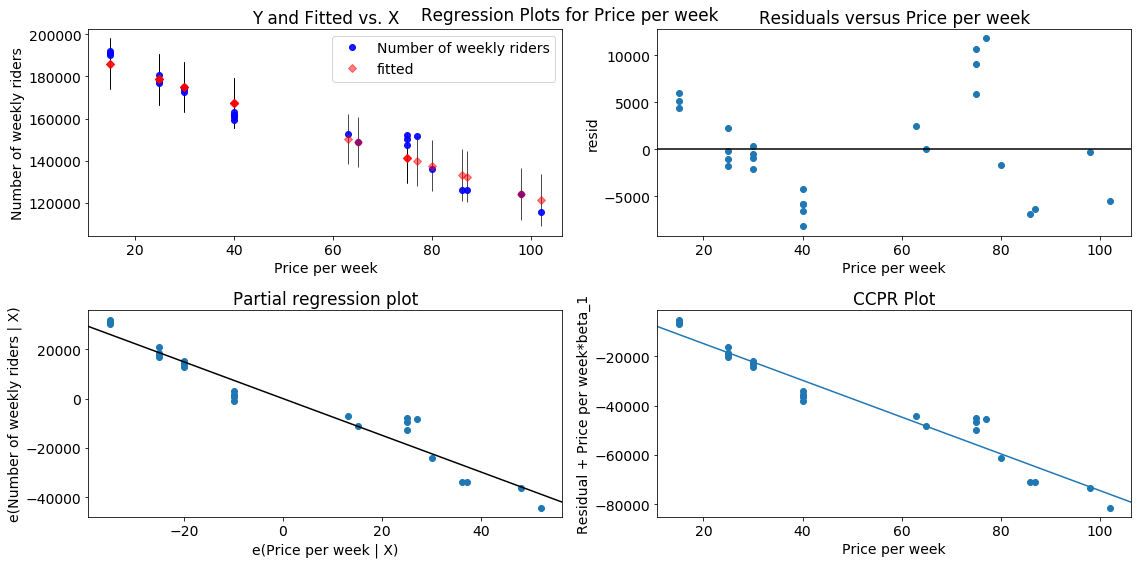

In [329]:
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)
fig = sm.graphics.plot_regress_exog(model, "Price per week")
fig.tight_layout(pad=1.0)

# Gradient Descent

In [358]:
class LMGradientDescent():
    def __init__(self, learning_rate):
        self.learning_rate=learning_rate
        self.m=0
        self.b=0
    
    def fit(self, X, y, epochs=1000):
        N=float(len(X))
        cost_history=[]
        m_history=[]
        b_history=[]
        
        for e in range(epochs):
            cost= mean_squared_error(y, (self.m * X + self.b))
            f=y-(self.m*X+self.b)
            
            if e % 100 == 0:
                print(f"Epoch: {e}, Cost: {cost}, m: {self.m}, b: {self.b})")
            
            cost_history.append(cost)
            m_history.append(self.m)
            b_history.append(self.b)
            
            m_gradient=-2 * (X.T).dot(f).sum()/N
            b_gradient=-2 * f.sum()/N
            self.m-=self.learning_rate*m_gradient
            self.b-=self.learning_rate*b_gradient
            
        return cost_history, m_history, b_history
    
    def predict(self, X):
        return self.m*X+self.b
        

In [354]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

In [340]:
X=np.array(df[['Price per week']])
y=np.array(df[['Number of weekly riders']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [355]:
# Feature scaling is important for gradient descent
# Should normalize x, y before entering into the model
standard_scaler=preprocessing.StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
y_train_scaled = standard_scaler.fit_transform(y_train)

C:\Users\xue.ju\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\xue.ju\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\xue.ju\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\xue.ju\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [372]:
# Fit the model and print cost result for evey 100 iteration
model=LMGradientDescent(learning_rate=0.01)
cost_history, m_history, b_history=model.fit(X_train_scaled, y_train_scaled, 2000)

Epoch: 0, Cost: 0.9999999999999998, m: 0, b: 0)
Epoch: 100, Cost: 0.09473998715989704, m: -0.8326250136475836, b: -2.183438615096141e-16)
Epoch: 200, Cost: 0.07881832238977049, m: -0.943047373184389, b: -2.971080172010765e-16)
Epoch: 300, Cost: 0.07853829299991931, m: -0.9576915374670107, b: -3.206694169458993e-16)
Epoch: 400, Cost: 0.07853336785796255, m: -0.9596336400306218, b: -3.3263515398908116e-16)
Epoch: 500, Cost: 0.07853328123482885, m: -0.9598912008101099, b: -3.334986607860115e-16)
Epoch: 600, Cost: 0.07853327971130575, m: -0.9599253584063018, b: -3.3177164719214995e-16)
Epoch: 700, Cost: 0.07853327968451013, m: -0.959929888371539, b: -3.3226507964753894e-16)
Epoch: 800, Cost: 0.07853327968403884, m: -0.9599304891335166, b: -3.3214172153369144e-16)
Epoch: 900, Cost: 0.07853327968403054, m: -0.9599305688063037, b: -3.322650796475387e-16)
Epoch: 1000, Cost: 0.0785332796840304, m: -0.9599305793724732, b: -3.3251179587523297e-16)
Epoch: 1100, Cost: 0.0785332796840304, m: -0.9599

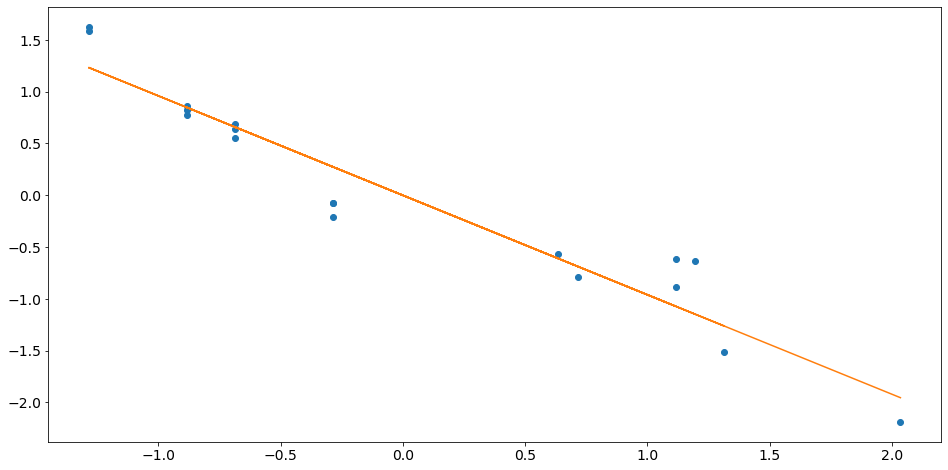

In [373]:
# Check how the regression line fit training set after 1900 interation
plt.plot(X_train_scaled, y_train_scaled, 'o')
m=-0.9599305809880024
b=-3.320183634198441e-16
plt.plot(X_train_scaled, m*X_train_scaled + b)
plt.show()

In [374]:
# Cross Validation: calculate the cost using test dataset
X_test_scaled = standard_scaler.fit_transform(X_test)
y_test_scaled = standard_scaler.fit_transform(y_test)
cv_cost_history=[]
for m, b in zip(m_history, b_history):
    f=y_test_scaled-(m*X_test_scaled+b)
    cost= mean_squared_error(y_test_scaled, (m * X_test_scaled + b))
    cv_cost_history.append(cost)

C:\Users\xue.ju\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\xue.ju\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\xue.ju\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\xue.ju\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


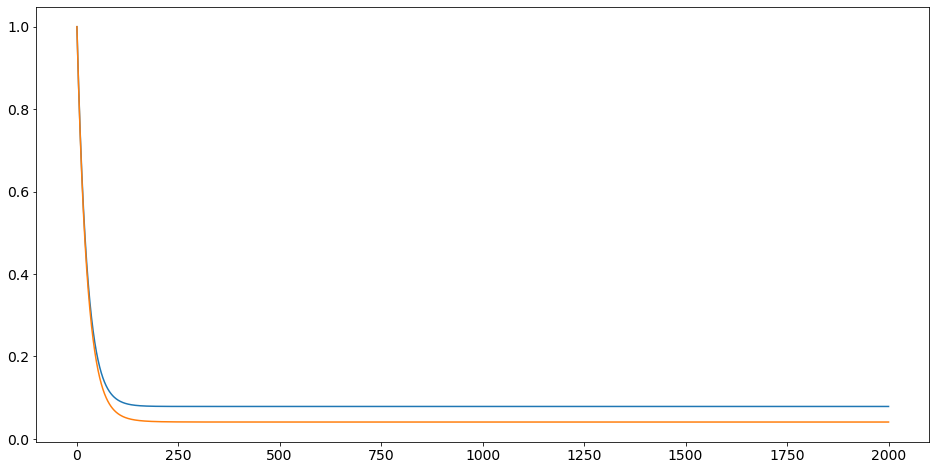

In [375]:
# Plot the train and cross validation cost result
plt.plot(range(1,len(cost_history)+1), cost_history, label='train_cost' )
plt.plot(range(1,len(cost_history)+1), cv_cost_history, label='cv_cost' )

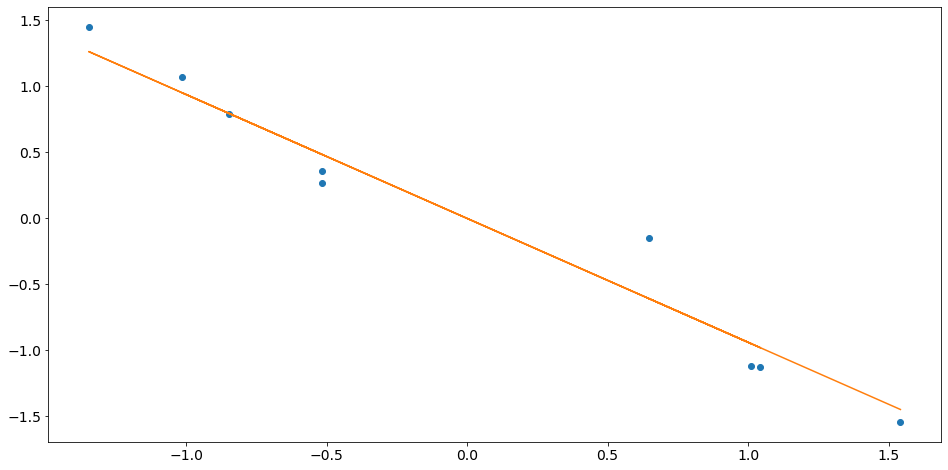

In [376]:
# Check how the regression line fit test set
plt.plot(X_test_scaled, y_test_scaled, 'o')
m=-0.9385377493420524
b=-2.9266712510257534e-16
plt.plot(X_test_scaled, m*X_test_scaled + b)
plt.show()

# Try Different Learning Rate

### small learning rate would make the model slower to converge

Epoch: 0, Cost: 0.9999999999999998, m: 0, b: 0)
Epoch: 100, Cost: 0.6959635426374445, m: -0.17416327258594771, b: -3.3948152930760365e-17)
Epoch: 200, Cost: 0.4922434237465337, m: -0.31672754612070664, b: -6.572520305780937e-17)
Epoch: 300, Cost: 0.35574042933281774, m: -0.43342592797078133, b: -9.419625573375245e-17)
Epoch: 400, Cost: 0.2642763776458628, m: -0.5289513495141065, b: -1.1983007179120878e-16)
Epoch: 500, Cost: 0.20299074221401847, m: -0.6071452885933419, b: -1.4518016418681612e-16)
Epoch: 600, Cost: 0.1619262032939637, m: -0.6711522514514326, b: -1.6781637807778438e-16)
Epoch: 700, Cost: 0.13441084272318146, m: -0.7235462265159907, b: -1.8158314358313633e-16)
Epoch: 800, Cost: 0.11597413097015036, m: -0.766434195269512, b: -1.9354888062631852e-16)
Epoch: 900, Cost: 0.10362058250801293, m: -0.8015408628116586, b: -2.0551461766950074e-16)
Epoch: 1000, Cost: 0.09534306742556929, m: -0.8302780154848927, b: -2.1799845879084123e-16)
Epoch: 1100, Cost: 0.08979670508683872, m: -0

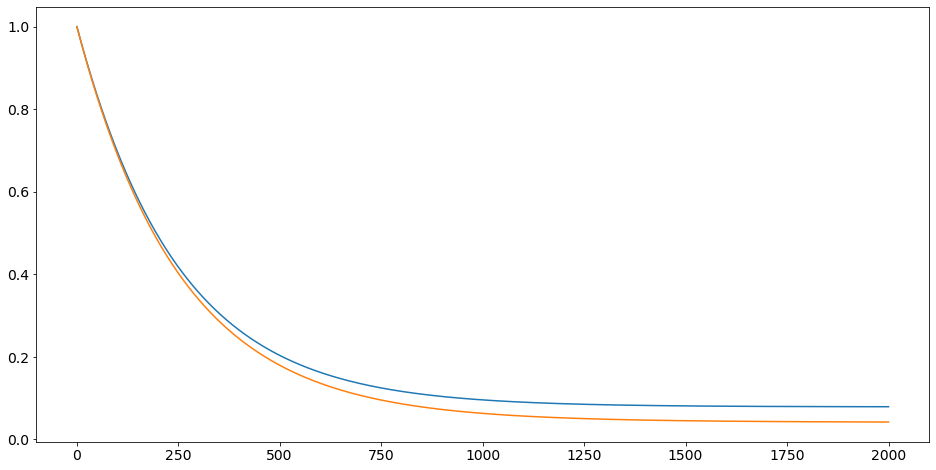

In [378]:
model=LMGradientDescent(learning_rate=0.001)
cost_history, m_history, b_history=model.fit(X_train_scaled, y_train_scaled, 2000)
cv_cost_history=[]
for m, b in zip(m_history, b_history):
    f=y_test_scaled-(m*X_test_scaled+b)
    cost= mean_squared_error(y_test_scaled, (m * X_test_scaled + b))
    cv_cost_history.append(cost)
plt.plot(range(1,len(cost_history)+1), cost_history, label='train_cost' )
plt.plot(range(1,len(cost_history)+1), cv_cost_history, label='cv_cost' )